In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/.......'

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/Dataset/Train'
test_dir = '/content/Dataset/Test'
val_dir = '/content/Dataset/Validation'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 140002 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 10905 images belonging to 2 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

Found 39428 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=3
)

Epoch 1/3
8750/8750 [==============================] - 2133s 243ms/step - loss: 0.5097 - accuracy: 0.7463 - val_loss: 0.4721 - val_accuracy: 0.7735
Epoch 2/3
8750/8750 [==============================] - 2031s 232ms/step - loss: 0.4816 - accuracy: 0.7638 - val_loss: 0.5111 - val_accuracy: 0.7510
Epoch 3/3
8750/8750 [==============================] - 2078s 237ms/step - loss: 0.4696 - accuracy: 0.7724 - val_loss: 0.4651 - val_accuracy: 0.7777


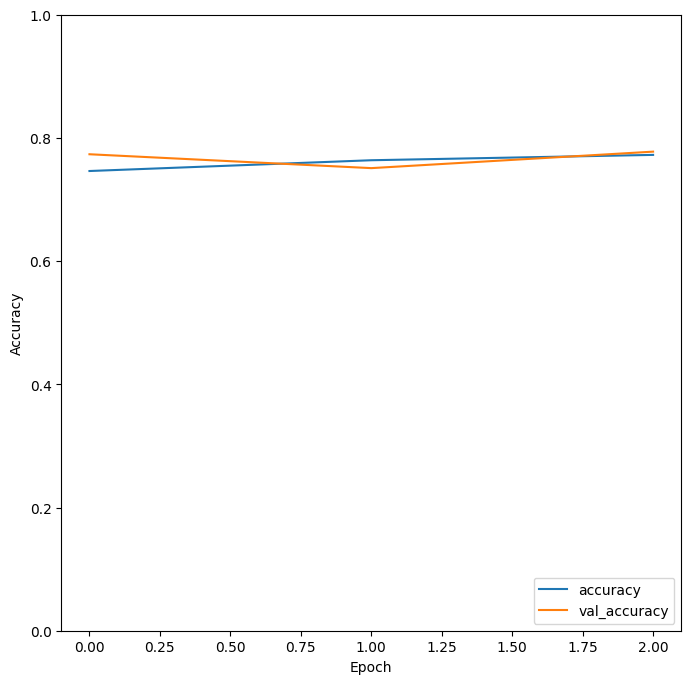

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

682/682 [==============================] - 49s 71ms/step - loss: 0.5434 - accuracy: 0.7283
Test accuracy: 72.83%
2465/2465 [==============================] - 170s 69ms/step - loss: 0.4651 - accuracy: 0.7777
Validation accuracy: 77.77%


1/1 [==============================] - 0s 38ms/step


<ipython-input-17-942909fefd48>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_labels[int(prediction[0] > 0.5)]


1/1 [==============================] - 0s 25ms/step


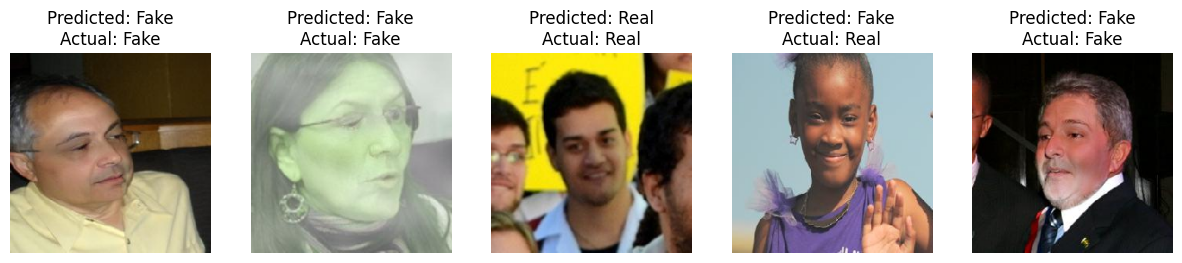

In [ ]:
class_labels = ['Fake', 'Real']


def display_validation_images(generator, model, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        img, label = next(generator)
        prediction = model.predict(img)
        predicted_label = class_labels[int(prediction[0] > 0.5)]
        plt.subplot(1, num_images, i+1)
        plt.imshow(img[0])
        plt.title(f"Predicted: {predicted_label}\nActual: {class_labels[int(label[0])]}")
        plt.axis('off')
    plt.show()

display_validation_images(val_generator, model, num_images=5)
